In [1]:
# import all neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# adding path directory
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# import scripts
from src.data_inspection import DataInspector, DataSummaryStatistics, DataTypeInspection
from src.load_data import load_file
from src.missing_value_analysis import SimpleMissingValueAnalysis

In [4]:
# load data
df = load_file("../data/raw/train.csv")

loading file ../data/raw/train.csv (Extension: .csv)
Successfully loaded data. Shape: (1460, 81)


In [5]:
# Data type inspection

# create a context with default strategy
inspector = DataInspector(DataTypeInspection())

if inspector.is_dataframe_valid(df):
    inspector.inspect(df)

=== Data Types in Data Frame ===


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# change strategy to summary
inspector.set_strategy(DataSummaryStatistics())

# Summary data of data frame
inspector.inspect(df)

=== Summary statistics ===

Numerical Features: 
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.64


Missing value count by column
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Visualize missing value...


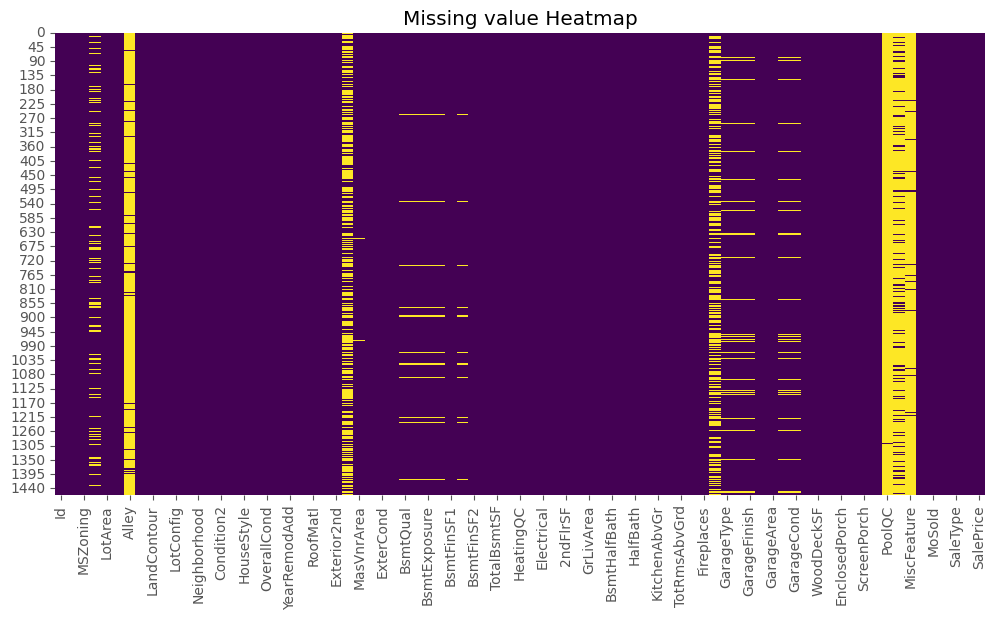

In [7]:
missing_value_analyzer = SimpleMissingValueAnalysis()

missing_value_analyzer.analyze(df=df)


=== Numerical Univariate Analysis ===


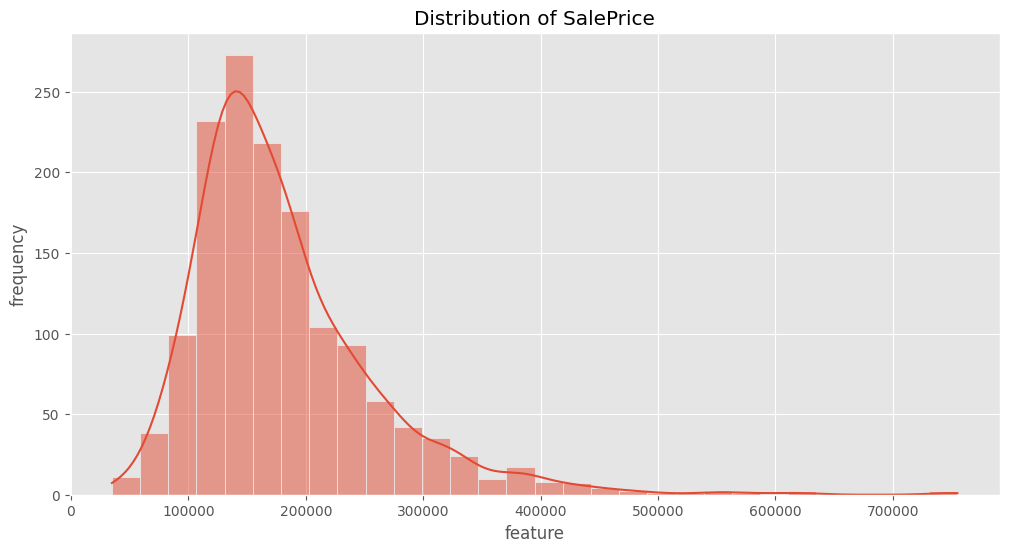

In [8]:
from src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.analyze(df, 'SalePrice')

/Users/decoding/Documents/01 - Software/Repositories/Personal_Repos/house-price-prediction/src/univariate_analysis.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x=feature, palette="muted")


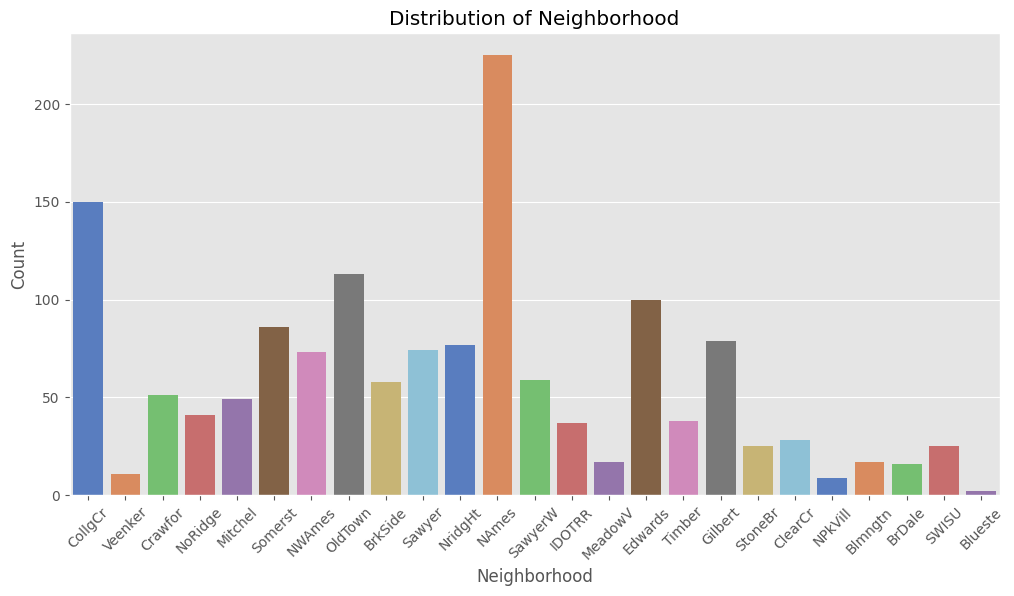

In [9]:
from src.univariate_analysis import CategoricalUnivariateAnalysis

univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.analyze(df, 'Neighborhood')

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

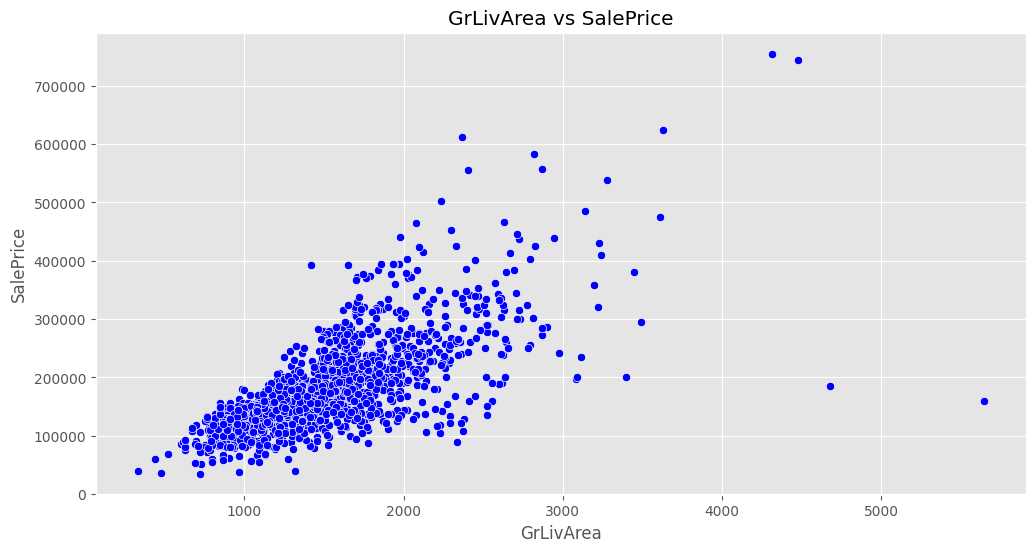

In [11]:
from src.bivariate_analysis import BivariateAnalyzer, NumericalNumericalAnalysis, NumericalCategoricalAnalysis

bivariate_analyzer = BivariateAnalyzer(NumericalNumericalAnalysis())
bivariate_analyzer.analyze(df=df, feature1='GrLivArea', feature2='SalePrice')

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


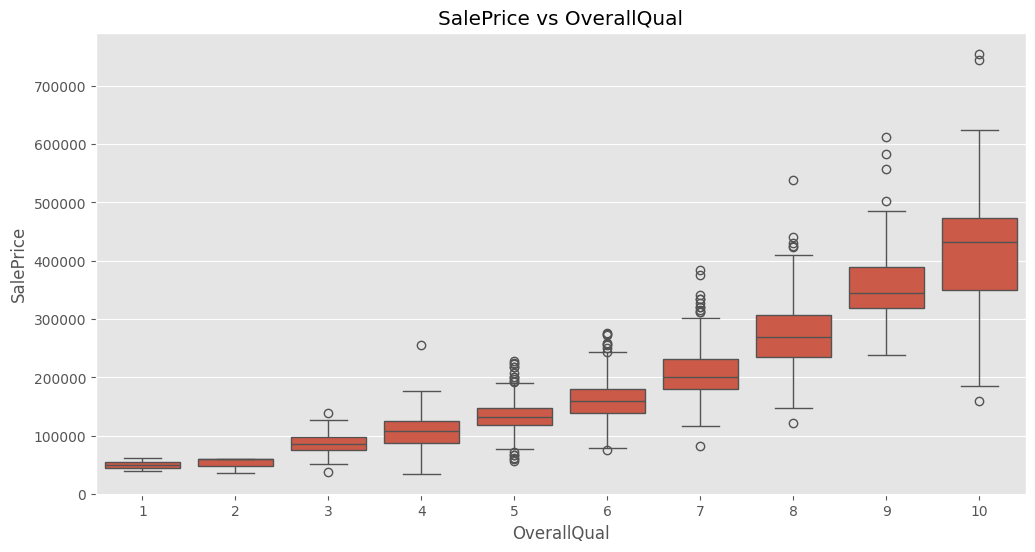

In [12]:
bivariate_analyzer.set_strategy(NumericalCategoricalAnalysis())

bivariate_analyzer.analyze(df=df, feature1='SalePrice', feature2='OverallQual')

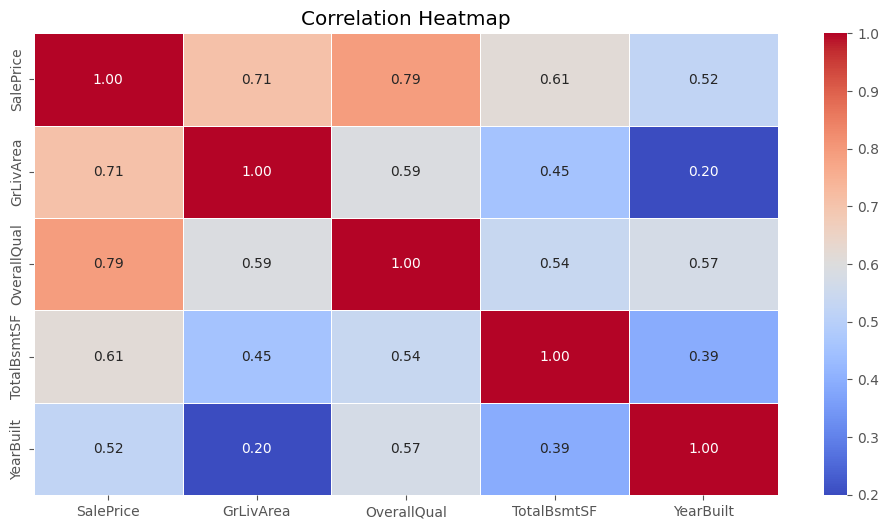

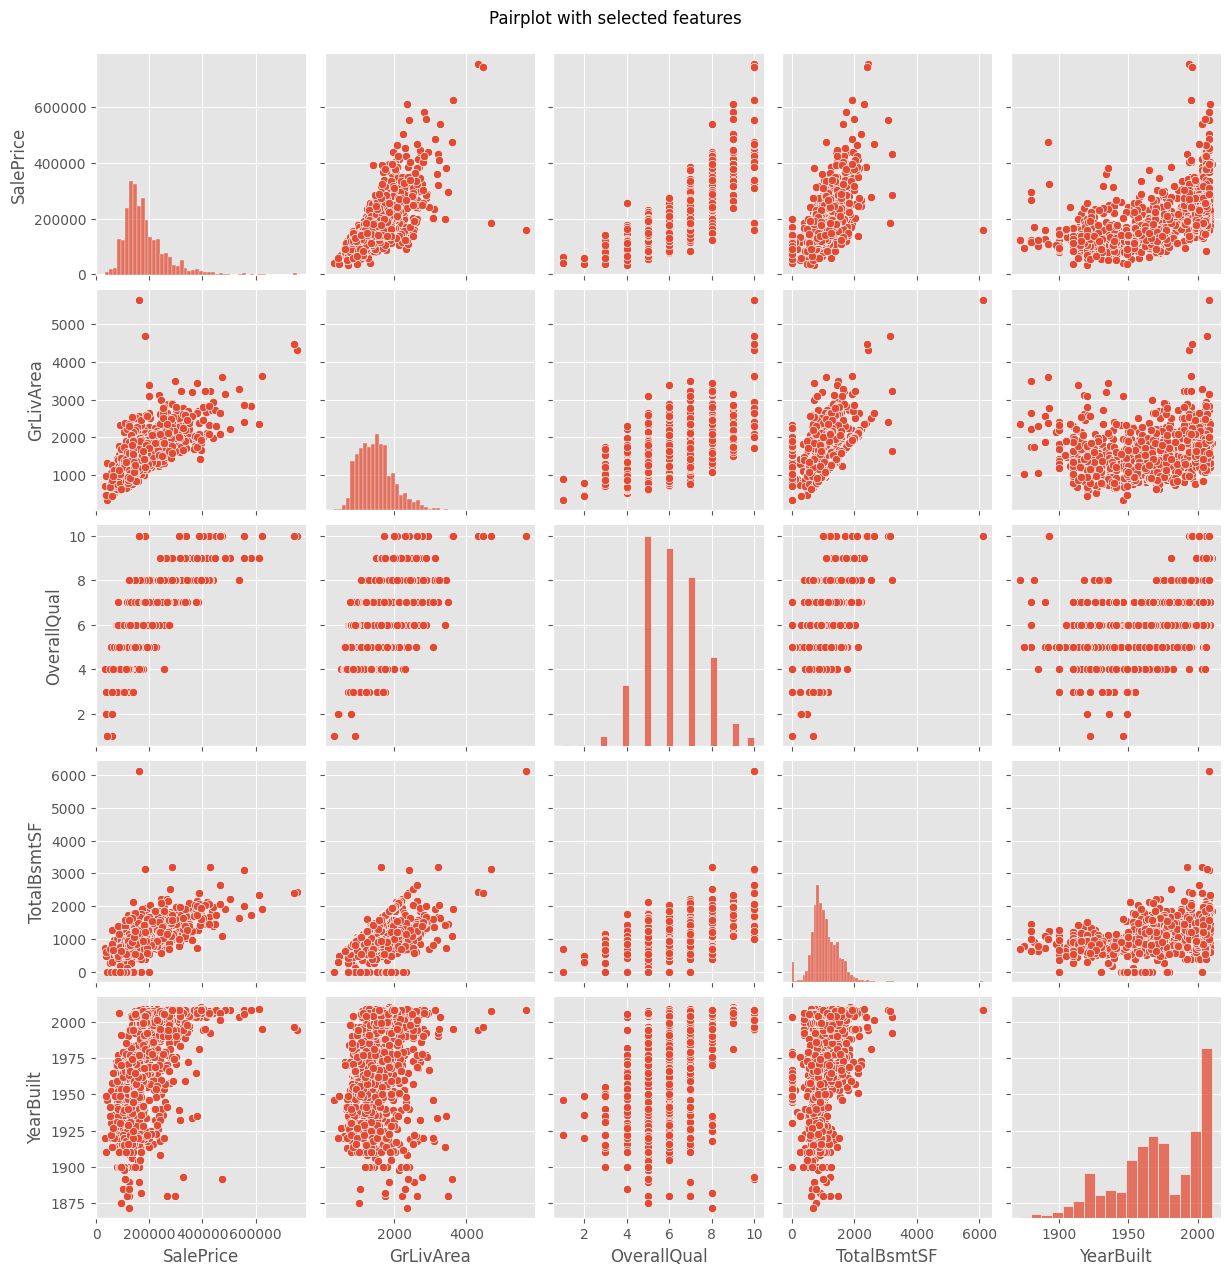

In [15]:
from src.multivariate_analysis import BasicMultivariateAnalysis

basic_analyzer = BasicMultivariateAnalysis()

selected_features = df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']]
basic_analyzer.analyze(selected_features)